In [1]:
import numpy as np
import brutefit as bf
import matplotlib.pyplot as plt

## Generate Multivariate Correlation

In [2]:
# generate data
np.random.seed(42)

ncov = 5  # number of covariates
ndat = 40  # number of data points
noise_rsd = 0.05  # noise relative standard deviation

X = np.random.uniform(size=(ndat, ncov))
# scale the X data
X *= np.random.uniform(1, 4, ncov)
# add some offsets
X += np.random.uniform(3, 7, ncov)

beta = np.random.uniform(-12, 12, ncov)  # true coefficients
beta[2] = 0  # X2 has no effect
c = np.random.uniform(10, 20, 1)  # add a bias

y = X.dot(beta) + c
y += np.random.normal(0, abs(y.mean()) * noise_rsd, ndat)  # add noise to data
y_std = np.random.normal(abs(y.mean()) * noise_rsd, abs(y.mean()) * noise_rsd / 3, ndat)  # variable measured uncertainties

Text(0, 0.5, 'y')

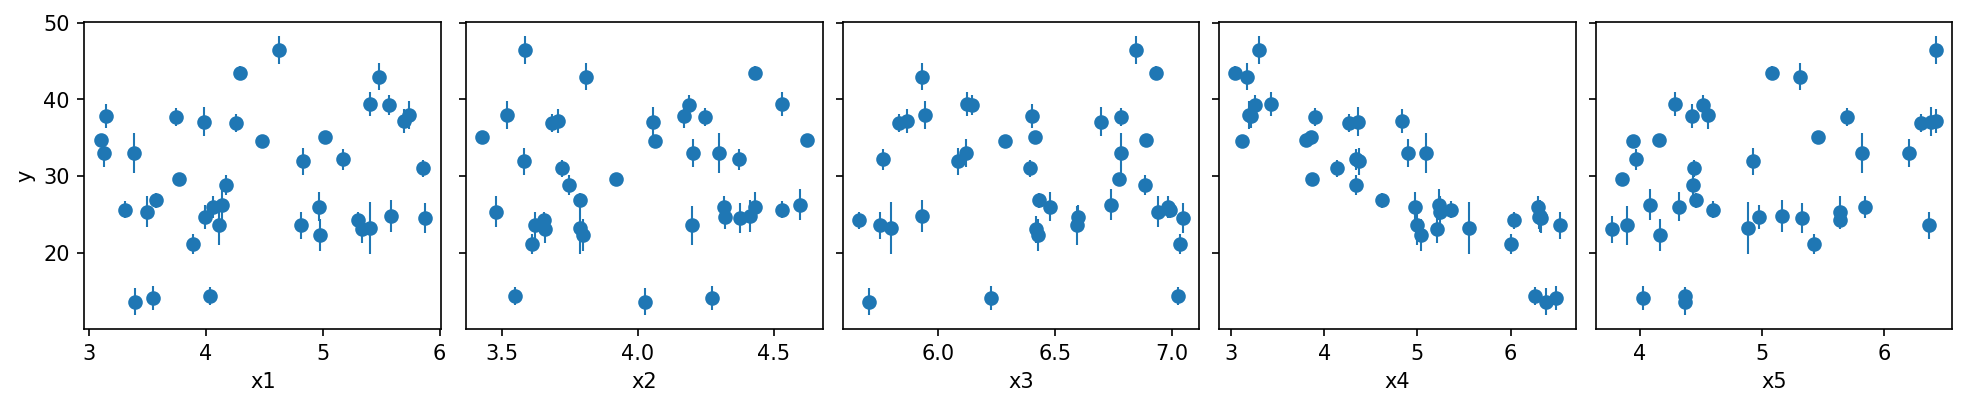

In [3]:
fig, axs = plt.subplots(1, ncov, figsize=(2.6 * ncov, 2.6), sharey=True, constrained_layout=True)

i = 1
for i in range(ncov):
    axs[i].scatter(X[:,i], y)
    axs[i].errorbar(X[:,i], y, y_std, lw=0, elinewidth=1)
    axs[i].set_xlabel(f'x{i + 1}')
axs[0].set_ylabel('y')

In [4]:
b = bf.Brute(X, y, w=1/y_std**2, include_bias=False)  # give X, y and weights (1/sqrt(std))
b.evaluate_polynomials()

Evaluating Models::   0%|          | 0/31 [00:00<?, ?it/s]

coefs                                          p_values                \
        X0^1      X1^1      X2^1      X3^1      X4^1      X0^1          X1^1   
0   0.128528  0.253425       NaN -0.866273  0.483311  0.000050  1.179008e-10   
1   0.134281  0.253425  0.011048 -0.865665  0.483738  0.000118  1.854477e-10   
2        NaN  0.212874       NaN -0.877917  0.499240       NaN  7.428828e-07   
3        NaN  0.221387 -0.051817 -0.878327  0.493893       NaN  4.126516e-07   
4        NaN       NaN       NaN -0.848111  0.407330       NaN           NaN   
5   0.024978       NaN       NaN -0.844745  0.400831  0.592455           NaN   
6        NaN       NaN -0.004887 -0.848037  0.406479       NaN           NaN   
7   0.030735       NaN  0.011056 -0.844136  0.401259  0.559168           NaN   
8        NaN       NaN       NaN -0.739822       NaN       NaN           NaN   
9   0.133979       NaN       NaN -0.731032       NaN  0.116130           NaN   
10       NaN  0.051739       NaN -0.741127       NaN       NaN  5.390554e-01   
11       NaN       NaN -0.081598 -0.742368       NaN       NaN           NaN   
12  0.193980  0.120700       NaN -0.730141       NaN  0.030412  1.679489e-01   
13  0.128119       NaN -0.011032 -0.731761       NaN  0.182574           NaN   
14       NaN  0.071936 -0.102208 -0.744826       NaN       NaN  4.112008e-01   
15  0.187038  0.120841 -0.013201 -0.731012       NaN  0.059214  1.759738e-01   
16       NaN       NaN       NaN       NaN  0.151453       NaN           NaN   
17       NaN  0.094002       NaN       NaN  0.188068       NaN  5.612476e-01   
18  0.167015       NaN       NaN       NaN  0.114794  0.286411           NaN   
19  0.195492       NaN       NaN       NaN       NaN  0.221978           NaN   
20  0.240039  0.172681       NaN       NaN  0.166027  0.138540  3.013623e-01   
21       NaN       NaN -0.021158       NaN  0.147865       NaN           NaN   
22       NaN  0.034500       NaN       NaN       NaN       NaN  8.304031e-01   
23       NaN       NaN -0.050665       NaN       NaN       NaN           NaN   
24  0.212957       NaN  0.089830       NaN  0.119943  0.229159           NaN   
25       NaN  0.100994 -0.042832       NaN  0.183528       NaN  5.463493e-01   
26  0.258398  0.126702       NaN       NaN       NaN  0.123702  4.450571e-01   
27  0.237066       NaN  0.079090       NaN       NaN  0.190406           NaN   
28  0.286878  0.173147  0.091197       NaN  0.171393  0.112464  3.087519e-01   
29       NaN  0.047112 -0.064095       NaN       NaN       NaN  7.775736e-01   
30  0.298308  0.125845  0.076736       NaN       NaN  0.110878  4.572167e-01   

                                           metrics  \
        X2^1          X3^1          X4^1        R2   
0        NaN  0.000000e+00  0.000000e+00  0.973453   
1   0.722681  0.000000e+00  0.000000e+00   0.97357   
2        NaN  0.000000e+00  2.220446e-16  0.955336   
3   0.147831  0.000000e+00  2.220446e-16  0.957609   
4        NaN  0.000000e+00  1.020966e-10   0.91837   
5        NaN  0.000000e+00  1.292051e-10  0.921654   
6   0.917777  0.000000e+00  1.580467e-10  0.918388   
7   0.832584  0.000000e+00  1.661091e-10  0.922326   
8        NaN  6.021561e-11           NaN  0.731205   
9        NaN  9.229528e-11           NaN  0.738774   
10       NaN  6.673639e-11           NaN  0.735362   
11  0.339051  8.243517e-11           NaN  0.729952   
12       NaN  1.071032e-10           NaN  0.743368   
13  0.907067  1.319340e-10           NaN  0.738541   
14  0.244845  8.495138e-11           NaN  0.734933   
15  0.890121  1.513929e-10           NaN  0.743441   
16       NaN           NaN  3.316645e-01   0.07422   
17       NaN           NaN  2.481455e-01  0.093605   
18       NaN           NaN  4.620042e-01  0.092667   
19       NaN           NaN           NaN  0.032389   
20       NaN           NaN  3.053003e-01  0.127551   
21  0.893053           NaN  3.501171e-01  0.073714   
22       NaN           NaN           NaN  0.001602   
23  0.753261    

The 'best' model correctly identifies that X2 has no influence on the data.

When fitting real data with arbitrary polynomial functions like this there is no single 'best' function that describes the data.
Rather, the data are most accurately described by a weighted sum of all polynomial predictions, where the contribution of each line is weighted by its Bayes factor.
We can see what this prediction looks like using:

0


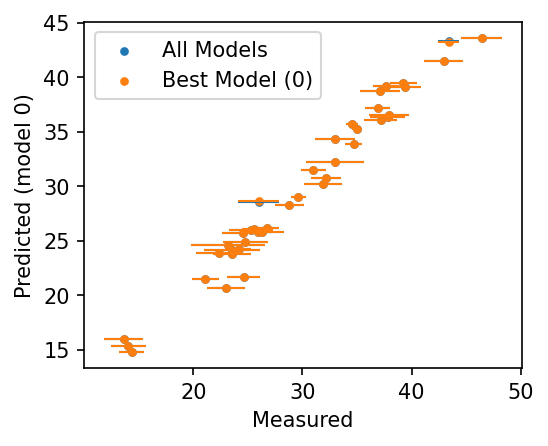

In [6]:
fig, ax = b.plot_obs_vs_pred(s=10, label='All Models')

b.plot_obs_vs_pred(s=10, model_ind=0, ax=ax, label='Best Model (0)')

ax.legend()

If this falls off the 1:1 line, it's telling you that polynomials of `X` at or under the order you've specified cannot capture the patterns in the data.
In practice, this either means there are higher order polynomial relationships or interaction terms that you have not included, or that important covariates are not included in `X`.

If this is close to the 1:1 line, we can visually assess the importance of the parameters by plotting the weighted distribution of model coefficients:

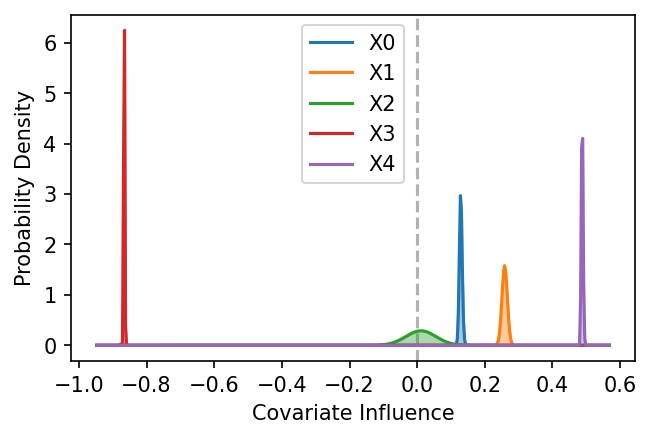

In [7]:
b.plot_param_dists()
plt.legend()

Each distribution represents the values of each covariate when it is included in a model, weighted by the Bayes factor of that model.
Sharp peaks mean that the value of that parameter is relatively independent of the model form.
Broad peaks denote a parameter that varies more with the addition or removal of other covariates.
The size of the parameter indicates the strenth of that effect within the data.
Note that by default all data are scaled before fitting, so the location of these peaks does not reflect optimal parameter values.
Rather, the position of these peaks represents the relative magnitude of the influence of each covariate relative to the range of the `X` data.

This approach allows you to identify the most probably model form to fit your data, which you can then use to fit the untransformed data externally.